<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Superintelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
env = gym.make('CartPole-v0')

In [4]:
# env.seed()

In [4]:
action_size = env.action_space.n
action_size

2

In [8]:
[env.action_space.sample() for _ in range(10)]

[0, 0, 1, 1, 1, 0, 1, 1, 1, 1]

In [12]:
state_size = env.observation_space.shape[0]
state_size

4

In [13]:
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

(array([-0.03978446,  0.04127089,  0.01299079, -0.00210409], dtype=float32),
 {})

In [14]:
state, reward, done, trunc, _ = env.step(env.action_space.sample())
state, reward, done, trunc, _

(array([-0.03895904,  0.23620415,  0.0129487 , -0.2906601 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [25]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()[0]
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, trunc, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = pd.concat((data, pd.DataFrame(results)))
        length.append(treward)

CPU times: user 3.12 s, sys: 155 ms, total: 3.27 s
Wall time: 3.17 s


In [26]:
np.array(length).mean()

115.0

In [31]:
np.array(length).sum()

345.0

In [27]:
length

[115.0, 120.0, 110.0]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      345 non-null    float32
 1   s2      345 non-null    float32
 2   s3      345 non-null    float32
 3   s4      345 non-null    float32
 4   a       345 non-null    int64  
 5   r       345 non-null    float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 13.5 KB


In [29]:
data.tail()

,s1,s2,s3,s4,a,r
105,1.193269,2.012532,-0.069406,-1.328928,1,1.0
106,1.233520,2.208457,-0.095984,-1.642498,0,1.0
107,1.277689,2.014581,-0.128834,-1.381199,1,1.0
108,1.317981,2.211054,-0.156458,-1.711238,1,1.0
109,1.362202,2.407589,-0.190683,-2.048251,1,1.0


In [30]:
data

,s1,s2,s3,s4,a,r
0,-0.028940,-0.021187,0.003745,0.022822,1,1.0
1,-0.029364,0.173881,0.004202,-0.268676,1,1.0
2,-0.025886,0.368942,-0.001172,-0.560031,0,1.0
3,-0.018507,0.173837,-0.012373,-0.267718,1,1.0
4,-0.015031,0.369133,-0.017727,-0.564277,0,1.0
...,...,...,...,...,...,...
105,1.193269,2.012532,-0.069406,-1.328928,1,1.0
106,1.233520,2.208457,-0.095984,-1.642498,0,1.0
107,1.277689,2.014581,-0.128834,-1.381199,1,1.0
108,1.317981,2.211054,-0.156458,-1.711238,1,1.0


In [34]:
np.array(length).cumsum()

array([115., 235., 345.])

In [36]:
length_cumsum = np.array(length).cumsum()
for i in range(len(length_cumsum)):
    print(data.iloc[[int(length_cumsum[i]) - 1]])
    print()


           s1        s2        s3        s4  a    r
114 -1.792857 -1.434393 -0.208726 -0.912865  1  1.0

           s1        s2        s3        s4  a    r
119 -0.793054 -1.314563  0.180972  1.936315  0  1.0

           s1        s2        s3        s4  a    r
109  1.362202  2.407589 -0.190683 -2.048251  1  1.0



In [37]:
12*2*np.pi/360

0.20943951023931953

In [38]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [39]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [40]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [17]:
# from tensorflow.python.framework.ops 
# # import (disable_eager_execution)
# disable_eager_execution()

In [41]:
from keras.layers import Dense
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [57]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

CPU times: user 464 ms, sys: 53.7 ms, total: 518 ms
Wall time: 457 ms


In [58]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.628382,0.641304,0.710550,0.565217
23,0.627586,0.644928,0.714497,0.565217
24,0.626866,0.641304,0.711424,0.565217


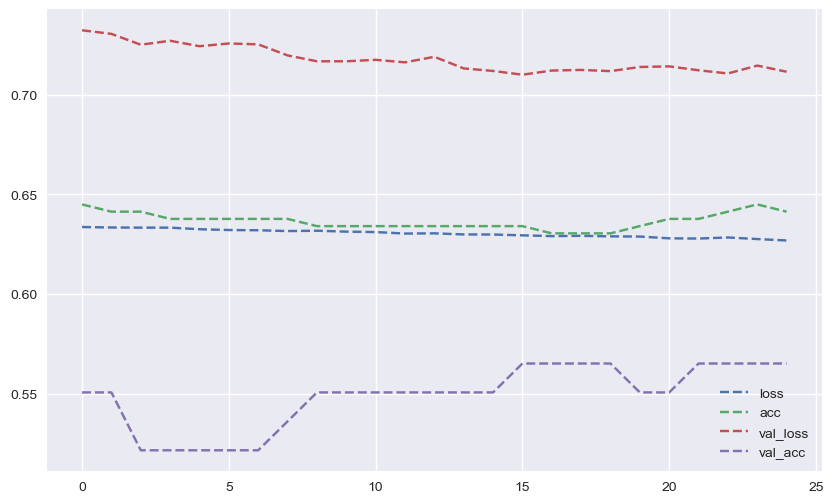

In [59]:
res.plot(figsize=(10, 6), style='--');

In [60]:
def epoch():
    print('|', end='')
    done = False
    state = env.reset()[0]
    trunc = False
    treward = 0
    while not done and not trunc:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, trunc, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [61]:
epoch()

1/1 [==============================] - 0s 9ms/step


200.0

In [62]:
%%time
res = np.array([epoch() for _ in range(100)])
print()
res

1/1 [==============================] - 0s 8ms/step

CPU times: user 7min 4s, sys: 33.5 s, total: 7min 37s
Wall time: 7min 14s


array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [26]:
res.mean()

200.0

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>